## Haar-Cascade Image Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# XML files from https://github.com/opencv/opencv/tree/master/data/haarcascades

IMG_HEIGHT = 1600

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
body_cascade = cv2.CascadeClassifier('haarcascade_upperbody.xml')


img = cv2.imread('image1.jpeg')

scale = IMG_HEIGHT / float(img.shape[0])
img = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Faces detected: 2
Eyes detected: 4


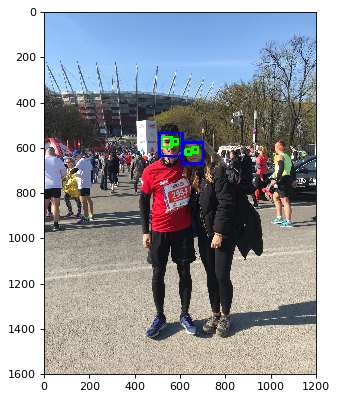

In [3]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
bodies = body_cascade.detectMultiScale(gray, 1.3, 5)
face_count = 0
eyes_count = 0

for (x,y,w,h) in bodies:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
if(len(bodies)!=0):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

for (x,y,w,h) in faces:
    face_count += 1
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        eyes_count += 1
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
#plt.imshow(img)

print("Faces detected: {}".format(face_count))
print("Eyes detected: {}".format(eyes_count))

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

#cv.startWindowThread()
#cv.waitKey(0)
#cv.destroyAllWindows()

## Feature detection: ORB 

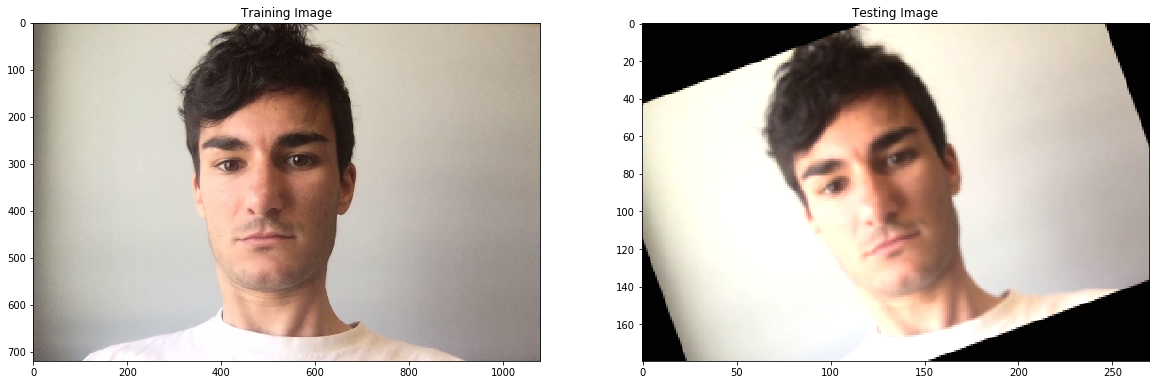

In [4]:
# Load image
image1 = cv2.imread('image.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance, Rotational Invariance, contrast and brightness
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 20, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

alpha = 1.2 # Simple contrast control
beta = 1.5    # Simple brightness control
test_image = cv2.convertScaleAbs(test_image, alpha=alpha, beta=beta)

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)


#image_test = cv.imread('image_test.jpg')
#image_test = cv.cvtColor(image_test, cv.COLOR_BGR2RGB)
#image_test_gray = cv.cvtColor(image_test, cv.COLOR_RGB2GRAY)

Number of Keypoints Detected in the Training Image:  500
Number of Keypoints Detected in the Query Image:  268


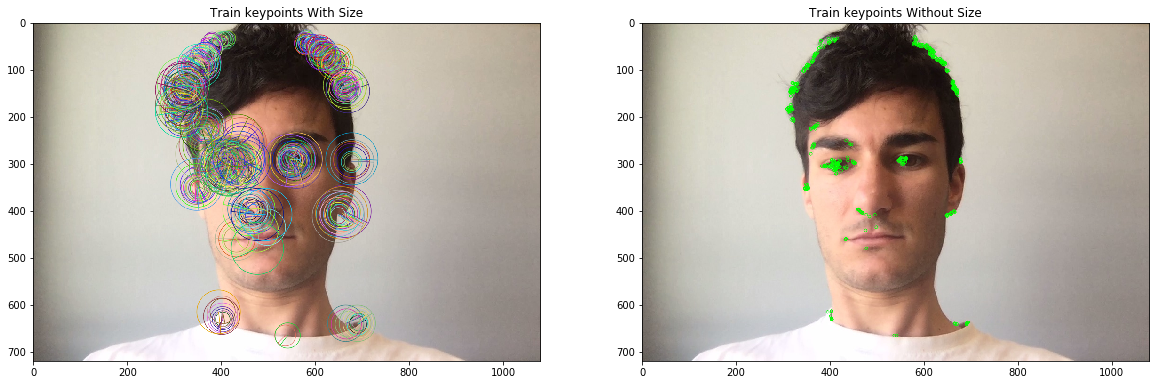

In [5]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected in the Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected in the Query Image: ", len(test_keypoints))

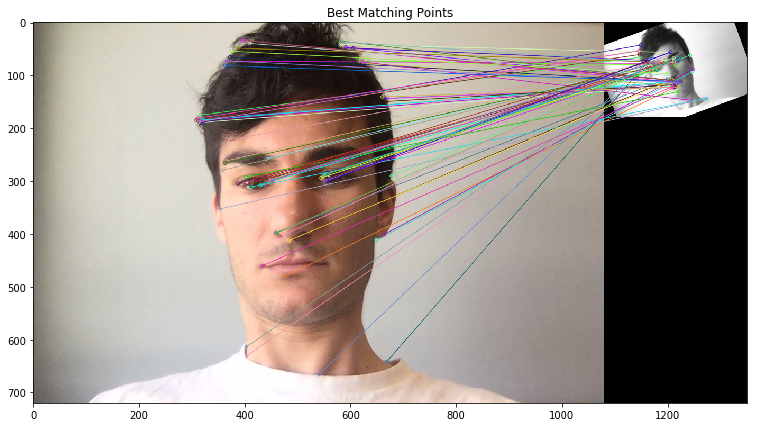


Matching Keypoints between images:  71


In [6]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# Matches with shorter distance
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nMatching Keypoints between images: ", len(matches))